In [9]:
import pandas as pd

df = pd.read_csv("C:/Users/Mohammed/Downloads/processed_dataset.csv")

In [11]:
df.head()

,Laatste vraagprijs,Bijdrage VvE,Soort appartement,Soort bouw,Soort dak,Wonen,Gebouwgebonden buitenruimte,Externe bergruimte,Inhoud,Aantal kamers,...,Cv-ketel,Tuin,Achtertuin,Ligging tuin,Soort garage,Capaciteit,year,month,Eigendomssituatie_Gemeentelijk eigendom belast met erfpacht,Eigendomssituatie_Volle eigendom
0,485000,0,0.001502,1,0.007291,151,0,0,625,5,...,0.016203,0.003364,0.032291,1,0.004173,1,2023,1,1,1
1,375000,0,0.001502,1,0.007291,117,0,5,415,5,...,0.016203,0.003249,0.029405,1,0.003496,0,2023,1,1,1
2,279500,0,0.001502,1,0.004810,94,0,0,365,3,...,0.016203,0.002737,0.032799,1,0.004241,0,2023,1,1,1
3,2330000,0,0.001502,1,-0.001625,307,0,0,921,8,...,0.016203,0.003439,0.031746,0,0.003496,0,2023,1,1,1
4,2270000,0,0.001502,1,-0.001625,307,0,0,921,8,...,0.016203,0.003439,0.031746,0,0.003496,0,2023,1,1,1


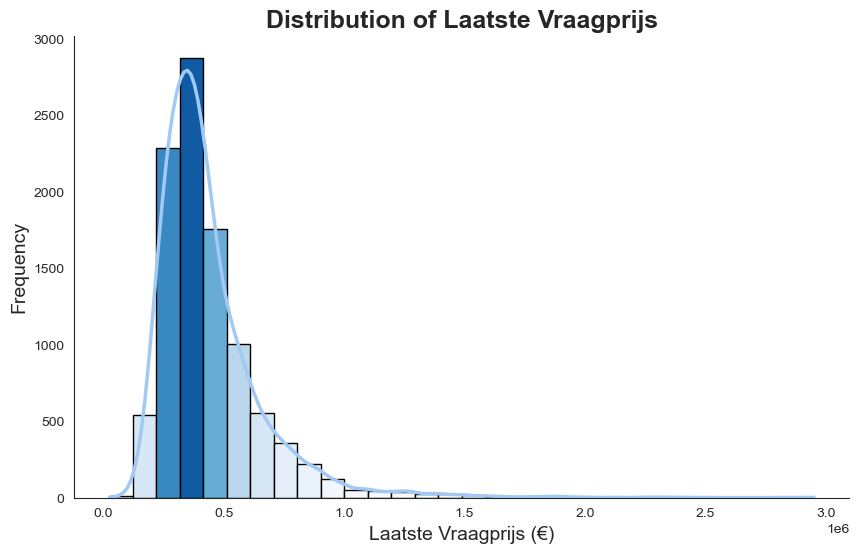

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

# Set the style for aesthetics
sns.set_style("white")
sns.set_palette("pastel")

# Create figure
plt.figure(figsize=(10, 6))

# Create histogram with a darker KDE line
hist = sns.histplot(
    data=df, x='Laatste vraagprijs', bins=30, kde=True, edgecolor='black', alpha=0.9,
    line_kws={'linewidth': 2.5, 'color': 'navy'}  # Thicker and darker KDE line
)

# Apply colormap to the bars
cmap = plt.cm.Blues  # Choose a color map
# Normalize with a slightly larger vmax to make the darkest bar lighter
vmax_adjusted = max(hist.patches, key=lambda patch: patch.get_height()).get_height() * 1.20
norm = Normalize(vmin=0, vmax=vmax_adjusted)

for bar in hist.patches:
    bar_height = bar.get_height()  # Get bar height
    bar.set_facecolor(cmap(norm(bar_height)))  # Apply color based on height

# Customize labels and title
plt.title('Distribution of Laatste Vraagprijs', fontsize=18, weight='bold')
plt.xlabel('Laatste Vraagprijs (€)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Remove top and right spines for a cleaner look
sns.despine()

# Save the figure
plt.savefig("new_distribution_target_value.png", dpi=300, bbox_inches='tight')
plt.show()

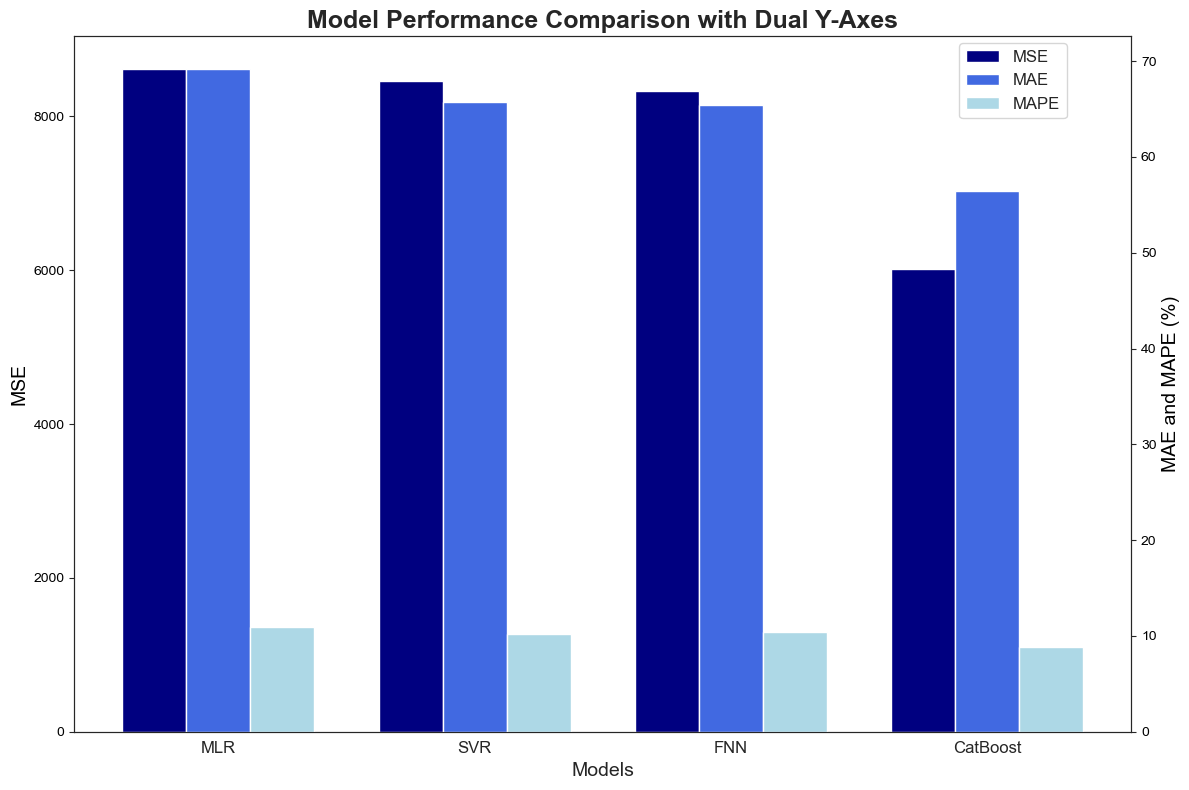

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

# Model evaluation metrics
models = ["MLR", "SVR", "FNN", "CatBoost"]
metrics = ["MSE", "MAE", "MAPE"]
values = {
    "MLR": [8610.69, 69.13, 10.91],
    "SVR": [8458.45, 65.74, 10.19],
    "FNN": [8336.58, 65.43, 10.36],
    "CatBoost": [6012.31, 56.45, 8.89]
}

# Convert data to numpy array for easy manipulation
data = np.array([values[model] for model in models]).T

# Plot setup for dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Primary y-axis (left) for MSE
ax1.set_xlabel("Models", fontsize=14)
ax1.set_ylabel("MSE", fontsize=14, color='black')
rects1 = ax1.bar(np.arange(len(models)) - 0.25, data[0], 0.25, label='MSE', color='navy')
ax1.tick_params(axis='y', labelcolor='black')

# Secondary y-axis (right) for MAE and MAPE
ax2 = ax1.twinx()
ax2.set_ylabel("MAE and MAPE (%)", fontsize=14, color='black')
rects2 = ax2.bar(np.arange(len(models)), data[1], 0.25, label='MAE', color='royalblue')
rects3 = ax2.bar(np.arange(len(models)) + 0.25, data[2], 0.25, label='MAPE', color='lightblue')
ax2.tick_params(axis='y', labelcolor='black')

# Title and x-axis labels
ax1.set_title("Model Performance Comparison with Dual Y-Axes", fontsize=18, weight='bold')
ax1.set_xticks(np.arange(len(models)))
ax1.set_xticklabels(models, fontsize=12)

# Remove gridlines
ax1.grid(False)
ax2.grid(False)

# Legends moved to top right
fig.legend(['MSE', 'MAE', 'MAPE'], loc='upper right', bbox_to_anchor=(0.9, 0.95), fontsize=12)

# Show plot
plt.tight_layout()
plt.show()